In [28]:
# Import packages 
import numpy as np 
import re 
from scipy.spatial import distance
import matplotlib.pyplot as plt 

In [7]:
# Load day 3 input 
input1 = [x for x in open('d3p1input').read().split('\n')]
input1

['R994,U598,L555,D997,R997,U529,L251,U533,R640,U120,L813,U927,L908,U214,L276,U306,L679,U187,R156,D654,L866,D520,R299,U424,R683,U49,R965,U531,R303,D4,L210,U425,R99,D892,R564,D671,L294,D908,L89,U855,R275,U790,R214,D588,L754,D873,R297,D97,R979,U850,L953,D281,L580,D254,L747,U115,L996,U641,R976,U585,L383,U498,L112,U329,R650,U772,L952,U325,L861,U831,R71,D853,R696,D812,R389,U456,L710,D116,R789,D829,L57,D940,R908,U569,R617,D832,L492,D397,R152,U898,L960,D806,L867,U928,L617,D281,L516,D214,R426,U530,R694,U774,L752,U215,L930,U305,R463,U774,R234,U786,R425,U470,R90,D383,R692,D626,L160,D588,L141,D351,R574,D237,L869,D499,R873,U856,R148,D919,L582,D804,L413,U201,L247,U907,L828,D279,L28,D950,L587,U290,R636,U344,L591,U118,L614,U203,R381,U634,L301,D197,R594,D373,L459,U504,L703,U852,L672,U613,R816,D712,R813,U97,R824,D690,L556,D308,L568,D924,L384,U540,R745,D679,R705,D808,L346,U927,R145,U751,L769,D152,L648,D553,L738,U456,R864,U486,R894,D923,R76,U211,L78,U145,R977,U297,R93,U200,L71,U665,L392,D309,L399,D594,R11

In [27]:
## Part 1 
# Split data by comma and insert into list 
u1 = list(input1[0].split(','))
v1 = list(input1[1].split(','))

In [129]:
# Initiate empty lists starting at 0 for x and y values for both u and v coordinates. 
# Iterate over each coordinate, and add/subtract dependending on the initial command. 
ux = [0]
uy = [0]

for i in range(len(u1)): 
    ux0 = ux[-1]
    uy0 = uy[-1]
    if re.sub('\d', '', u1[i]) == 'R':
        uy1 = uy0 + int(re.sub('\D', '', u1[i]))
        uy.append(uy1)
        ux.append(ux0)
    elif re.sub('\d', '', u1[i]) == 'L':
        uy1 = uy0 - int(re.sub('\D', '', u1[i]))
        uy.append(uy1)
        ux.append(ux0)
    elif re.sub('\d', '', u1[i]) == 'U':
        ux1 = ux0 + int(re.sub('\D', '', u1[i]))
        ux.append(ux1)
        uy.append(uy0)
    else: 
        ux1 = ux0 - int(re.sub('\D', '', u1[i]))
        ux.append(ux1)
        uy.append(uy0)

In [141]:
vx = [0]
vy = [0]

for i in range(len(v1)): 
    vx0 = vx[-1]
    vy0 = vy[-1]
    if re.sub('\d', '', v1[i]) == 'R':
        vy1 = vy0 + int(re.sub('\D', '', v1[i]))
        vy.append(vy1)
        vx.append(vx0)
    elif re.sub('\d', '', v1[i]) == 'L':
        vy1 = vy0 - int(re.sub('\D', '', v1[i]))
        vy.append(vy1)
        vx.append(vx0)
    elif re.sub('\d', '', v1[i]) == 'U':
        vx1 = vx0 + int(re.sub('\D', '', v1[i]))
        vx.append(vx1)
        vy.append(vy0)
    else: 
        vx1 = vx0 - int(re.sub('\D', '', v1[i]))
        vx.append(vx1)
        vy.append(vy0)

In [146]:
# Convert lists to arrays
ux = np.array(ux)
uy = np.array(uy)
vx = np.array(vx)
vy = np.array(vy)

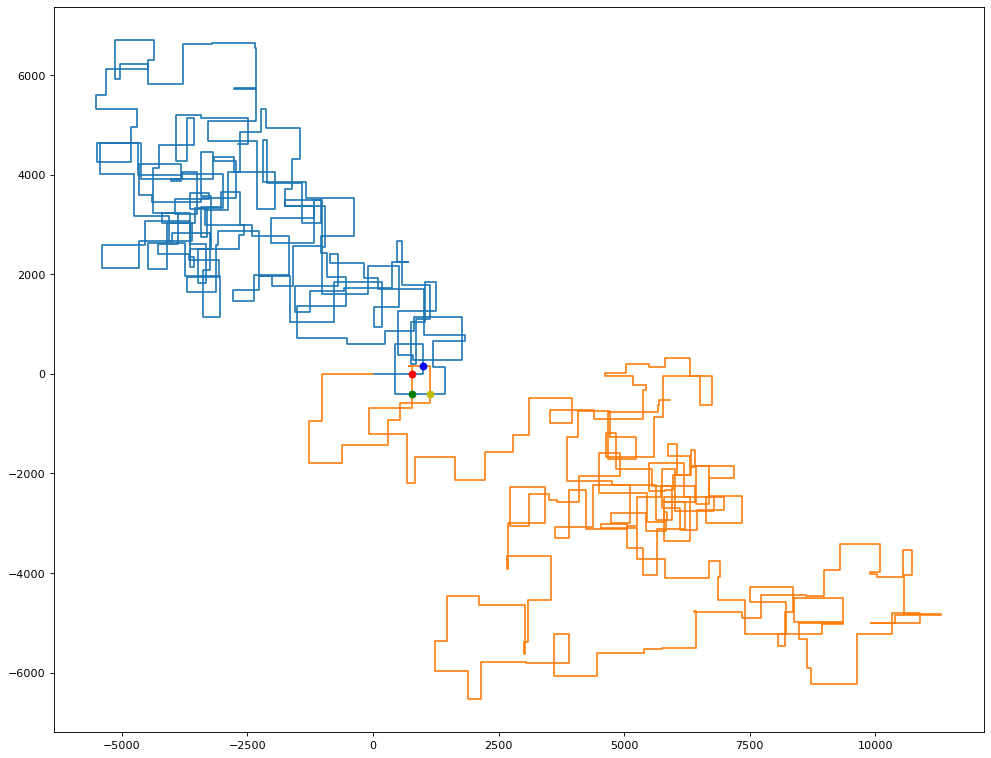

In [262]:
# Plot figures with intersection points
plt.figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
plt.plot(uy, ux, '-')
plt.plot(vy, vx, '-')

plt.plot(768, 0, 'ro')
plt.plot(768, -399, 'go')
plt.plot(994, 166, 'bo')
plt.plot(1126, -399, 'yo')
plt.show()

In [264]:
# Initiate tuples with each intersection point to calculate Manhattan distance 
origin = (0, 0)
intersect1 = (768, 0)
intersect2 = (768, -399)
intersect3 = (994, 166)
intersect4 = (1126, -399)

In [265]:
print(distance.cityblock(intersect1, origin))
print(distance.cityblock(intersect2, origin))
print(distance.cityblock(intersect3, origin))
print(distance.cityblock(intersect4, origin))

768
1167
1160
1525


In [267]:
## Part2
# Calculate shortest traversed distance from origin to intersection. 
# Closest intersection occurs at (994, 166)

# (994, 166) is crossed on the third step of u list 
for i in range(3): 
    print(i, (uy[i], ux[i]))

0 (0, 0)
1 (994, 0)
2 (994, 598)


In [270]:
# (994, 166) is crossed between steps 12 and 13 of v list 
for i in range(14):
    print(i, (vy[i], vx[i]))

0 (0, 0)
1 (-1005, 0)
2 (-1005, -937)
3 (-1265, -937)
4 (-1265, -1785)
5 (-625, -1785)
6 (-625, -1427)
7 (306, -1427)
8 (306, -932)
9 (531, -932)
10 (531, -588)
11 (1126, -588)
12 (1126, 166)
13 (716, 166)


In [272]:
# Add absolute distances of all steps 
uDist = 994 + 166
vDist = 1005 + 937 + 260 + 848 + 640 + 358 + 931 + 495 + 225 + 344 + 595 + 754 + (1126-994)
uDist + vDist

8684

In [275]:
# More elegant solution to parts 1 and 2 from jonathan_paulson with corrections by mcpower_ 
# on Reddit post https://www.reddit.com/r/adventofcode/comments/e5bz2w/2019_day_3_solutions/

A, B = list(map(str.rstrip, open('d3p1input')))
A, B = [x.split(',') for x in [A, B]]

In [276]:
DX = dict(zip('LRUD', [-1, 1, 0, 0]))
DY = dict(zip('LRUD', [0, 0, 1, -1]))

In [220]:
def get_points(A):
    '''
    Starts x and y at coordinates (0, 0). Length counts +1 in any direction the lines move, making sure that there is one mark for each coordinate passed. This makes it
    easier to find intersections. 
    '''
    x = 0
    y = 0
    length = 0
    # Answers are stored in a dictionary 
    ans = {}
    # For every LRUD command in the input list 
    for cmd in A:
        d = cmd[0]
        n = int(cmd[1:])
        assert d in ['L', 'R', 'U', 'D']
        for _ in range(n):
            # x and y are changed by 1 in direction D. This will help with part 1
            x += DX[d]
            y += DY[d]
            # Length always increases by 1. This helps with part 2 
            length += 1
            if (x,y) not in ans:
                ans[(x,y)] = length
    return ans

In [221]:
# Get all coordinate points that A and B cross
PA = get_points(A)
PB = get_points(B)

In [277]:
# Create a dictionary of the four coordinates where lines A and B intersect. Notice they are the same points marked on the earlier plot. 
both = set(PA.keys()) & set(PB.keys())
print(both)

{(768, -399), (1126, -399), (994, 166), (768, 0)}


In [282]:
# Part one requires we find the Manhattan distance between x and y on each intersection. I changed part 1 to use distance.cityblock instead of abs(x) + abs(y)
part1 = min(distance.cityblock(x, y) for (x,y) in both)

# Part two requires we find the absolute distance from the origin to the closest intersection. 
part2 = min([PA[p] + PB[p] for p in both])
print("Answer 1: {}\nAnswer 2: {}".format(part1, part2))

# Notice that these are the same answers obtained in my original (and longer, less intuitive, highly manual) code. 

Answer 1: 768
Answer 2: 8684
